In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("cs1090a_hw5.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS1090A Introduction to Data Science: 
## Homework 5: Multiclass Classification & Decision Trees

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

# 🎓 Predicting Student Outcomes 🕳️

In this assignment, you will construct and evaluate classification models to predict student outcomes (“Dropout,” “Enrolled,” or “Graduate”) using demographic, socio-economic, and academic data available at the point of enrollment. The aim is to identify students at risk and understand the factors contributing to their academic outcomes.

The dataset used in this assignment originates from the Polytechnic Institute of Portalegre, Portugal, and includes information such as demographics, socio-economic background, and academic history at the time of enrollment. The classification task involves predicting whether a student will graduate, remain enrolled, or drop out, which poses unique challenges, including class imbalance.

More information on the dataset and related modeling approaches can be found in the paper "Early Prediction of Student’s Performance in Higher Education: A Case Study" by Martins et al.. We have included a PDF of this paper in the data directory for your reference.

<div style = "background: orange; border: thin solid black; border-radius: 2px; padding: 5px">
<details>
<summary><strong>Dataset Information</strong> (click to expand)</summary>

| Variable Name                       | Description                                                                                                                                                                                                                             |
|-------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Marital Status                      | **1** – single, **2** – married, **3** – widower, **4** – divorced, **5** – facto union, **6** – legally separated                                                                                                                                              |
| Application mode                    | **1** - 1st phase - general contingent, **2** - Ordinance No. 612/93, **5** - 1st phase - special contingent (Azores Island), **7** - Holders of other higher courses, **10** - Ordinance No. 854-B/99, **15** - International student (bachelor), **16** - 1st phase - special contingent (Madeira Island), **17** - 2nd phase - general contingent, **18** - 3rd phase - general contingent, **26** - Ordinance No. 533-A/99, item b2) (Different Plan), **27** - Ordinance No. 533-A/99, item b3 (Other Institution), **39** - Over 23 years old, **42** - Transfer, **43** - Change of course, **44** - Technological specialization diploma holders, **51** - Change of institution/course, **53** - Short cycle diploma holders, **57** - Change of institution/course (International) |
| Application order                   | Application order (between **0** - first choice and **9** - last choice)                                                                                                                                                                        |
| Course                              | **33** - Biofuel Production Technologies, **171** - Animation and Multimedia Design, **8014** - Social Service (evening attendance), **9003** - Agronomy, **9070** - Communication Design, **9085** - Veterinary Nursing, **9119** - Informatics Engineering, **9130** - Equinculture, **9147** - Management, **9238** - Social Service, **9254** - Tourism, **9500** - Nursing, **9556** - Oral Hygiene, **9670** - Advertising and Marketing Management, **9773** - Journalism and Communication, **9853** - Basic Education, **9991** - Management (evening attendance) |
| Daytime/evening attendance          | **1** – daytime, **0** - evening                                                                                                                                                                                                                |
| Previous qualification              | **1** - Secondary education, **2** - Higher education - bachelor's degree, **3** - Higher education - degree, **4** - Higher education - master's, **5** - Higher education - doctorate, **6** - Frequency of higher education, **9** - 12th year of schooling - not completed, **10** - 11th year of schooling - not completed, **12** - Other - 11th year of schooling, **14** - 10th year of schooling, **15** - 10th year of schooling - not completed, **19** - Basic education 3rd cycle (9th/10th/11th year) or equiv., **38** - Basic education 2nd cycle (6th/7th/8th year) or equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **42** - Professional higher technical course, **43** - Higher education - master (2nd cycle) |
| Previous qualification (grade)      | Grade of previous qualification (between **0** and **200**)                                                                                                                                                                                      |
| Nationality                         | **1** - Portuguese, **2** - German, **6** - Spanish, **11** - Italian, **13** - Dutch, **14** - English, **17** - Lithuanian, **21** - Angolan, **22** - Cape Verdean, **24** - Guinean, **25** - Mozambican, **26** - Santomean, **32** - Turkish, **41** - Brazilian, **62** - Romanian, **100** - Moldova (Republic of), **101** - Mexican, **103** - Ukrainian, **105** - Russian, **108** - Cuban, **109** - Colombian |
| Mother's qualification              | **1** - Secondary Education - 12th Year of Schooling or Eq., **2** - Higher Education - Bachelor's Degree, **3** - Higher Education - Degree, **4** - Higher Education - Master's, **5** - Higher Education - Doctorate, **6** - Frequency of Higher Education, **9** - 12th Year of Schooling - Not Completed, **10** - 11th Year of Schooling - Not Completed, **11** - 7th Year (Old), **12** - Other - 11th Year of Schooling, **14** - 10th Year of Schooling, **18** - General commerce course, **19** - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv., **22** - Technical-professional course, **26** - 7th year of schooling, **27** - 2nd cycle of the general high school course, **29** - 9th Year of Schooling - Not Completed, **30** - 8th year of schooling, **34** - Unknown, **35** - Can't read or write, **36** - Can read without having a 4th year of schooling, **37** - Basic education 1st cycle (4th/5th year) or equiv., **38** - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv., **39** - Technological specialization course, **40** - Higher education - degree (1st cycle), **41** - Specialized higher studies course, **42** - Professional higher technical course, **43** - Higher Education - Master (2nd cycle), **44** - Higher Education - Doctorate (3rd cycle) |
| Father's qualification              | Similar values as Mother's qualification (refer to full details above)                                                                                                                                                                   |
| Mother's occupation                 | **0** - Student, **1** - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers, **2** - Specialists in Intellectual and Scientific Activities, **3** - Intermediate Level Technicians and Professions, **4** - Administrative staff, **5** - Personal Services, Security and Safety Workers and Sellers, **6** - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry, **7** - Skilled Workers in Industry, Construction and Craftsmen, **8** - Installation and Machine Operators and Assembly Workers, **9** - Unskilled Workers, **10** - Armed Forces Professions, **90** - Other Situation, **99** - (blank), **122** - Health professionals, **123** - teachers, **125** - Specialists in information and communication technologies (ICT), **131** - Intermediate level science and engineering technicians and professions, **132** - Technicians and professionals, of intermediate level of health, **134** - Intermediate level technicians from legal, social, sports, cultural and similar services, **141** - Office workers, secretaries in general and data processing operators, **143** - Data, accounting, statistical, financial services and registry-related operators, **144** - Other administrative support staff, **151** - personal service workers, **152** - sellers, **153** - Personal care workers and the like, **171** - Skilled construction workers and the like, except electricians, **173** - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like, **175** - Workers in food processing, woodworking, clothing and other industries and crafts, **191** - cleaning workers, **192** - Unskilled workers in agriculture, animal production, fisheries and forestry, **193** - Unskilled workers in extractive industry, construction, manufacturing and transport, **194** - Meal preparation assistants |
| Father's occupation                 | Similar values as Mother's occupation (refer to full details above)                                                                                                                                                                     |
| Admission grade                     | Admission grade (between **0** and **200**)                                                                                                                                                                                                     |
| Displaced                           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Educational special needs           | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Debtor                              | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Tuition fees up to date             | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Gender                              | **1** – male, **0** – female                                                                                                                                                                                                                     |
| Scholarship holder                  | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Age at enrollment                   | Age of student at enrollment                                                                                                                                                                                                            |
| International                       | **1** – yes, **0** – no                                                                                                                                                                                                                          |
| Curricular units 1st sem (credited) | Number of curricular units credited in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (enrolled) | Number of curricular units enrolled in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (evaluations) | Number of evaluations to curricular units in the 1st semester                                                                                                                                                                            |
| Curricular units 1st sem (approved) | Number of curricular units approved in the 1st semester                                                                                                                                                                                  |
| Curricular units 1st sem (grade)    | Grade average in the 1st semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 1st sem (without evaluations) | Number of curricular units without evaluations in the 1st semester                                                                                                                                                                       |
| Curricular units 2nd sem (credited) | Number of curricular units credited in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (enrolled) | Number of curricular units enrolled in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (evaluations) | Number of evaluations to curricular units in the 2nd semester                                                                                                                                                                            |
| Curricular units 2nd sem (approved) | Number of curricular units approved in the 2nd semester                                                                                                                                                                                  |
| Curricular units 2nd sem (grade)    | Grade average in the 2nd semester (between **0** and **20**)                                                                                                                                                                                     |
| Curricular units 2nd sem (without evaluations) | Number of curricular units without evaluations in the 2nd semester                                                                                                                                                                       |
| Unemployment rate                   | Unemployment rate (%)                                                                                                                                                                                                                    |
| Inflation rate                      | Inflation rate (%)                                                                                                                                                                                                                       |
| GDP                                 | GDP                                                                                                                                                                                                                                      |
| Target                              | The problem is formulated as a three-category classification task: **dropout**, **enrolled**, or **graduate** at the end of the normal duration of the course                                                                                                                              |

</details>
</div>

<p>
<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Guidelines</strong>
</span>
</p>

This assignment is intentionally **open-ended**. You will not receive explicit instructions for every step—it is up to you to **make informed decisions** and **justify** them.

Consider every choice carefully, and support your decisions with **evidence** such as plots, metrics, or references to the literature.

The goal is to apply your data science expertise to a real-world problem where there may not be a single correct answer but rather multiple valid approaches that can be logically defended.

Feel free to add code and markdown cells as you need them. 

<span style = "background: lightgreen; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>HW5 Overview</strong>
</span>

- EDA & General Preprocessing
- Model 1: OvR Logistic Regression
- Model 2: Decicion Tree Classifier
- Model 3: Custom Classifier
- Model Comparison & Kaggle Submissions
- Causal Inference (BONUS)
- Wrap-up

🏆 **Each of the 3 models has an associated Kaggle competition. Making it into the top 20 on any of the leaderboards will earn you bonus points.**

<span style = "background: violet; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>Submission Requirements</strong>
</span>

- The notebook submitted to Canvas must **run from top to bottom** without errors and contain **all output**.
- Notebooks are intended for human readers. Prose should appear in markdown cells, not code comments.
- Notebooks should contain no excessive output and no non-functional code unless the latter is included with the expressive purpose of communicating something to the reader. 
- Predictions must be saved in the specified paths when the notebook is run to facilitate staff verification.
- Kaggle submissions whose performance cannot be reproduced by the appropriate model in the related notebook submission will be disqualified.

<p>
<span style = "background: red; border: thin solid black; border-radius: 2px; padding: 5px">
<strong>☣️ HW Submissions Copy-Pasted from Generative AI Output Will Receive No Credit ☣️</strong>
</span>
</p>



In [3]:
import os
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, \
                        GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score

# For optional causal inference section
# from psmpy import PsmPy
# from psmpy.functions import cohenD
# from psmpy.plotting import *

In [4]:
# For calculating total notebook runtime
notebook_start = time.time()

## EDA & General Preprocessing

Load and explore the dataset. Your EDA should help inform your later modeling decisions. 

**Hints:**

- Consider methods to handle class imbalance, feature scaling, categorical variable encoding, and any necessary feature engineering. Provide justification for the choice you make, including reasons for *not* taking certain actions that might be considered standard in the given context.
- You may decide that your different models require their own distinct preprocessing steps rather than taking a one-size-fits-all approach.
- Take a moment to look at the imports provided above. You may find these useful through the notebook.

---

In [5]:
# your code here
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')

X_train.head()
print("Training shape:", X_train.shape)
print("Training shape:", y_train.shape)
print("Test shape:", X_test.shape)
print(X_train.info())

# Check 
print("\nClass Distribution:")
print(y_train['Target'].value_counts())

print("\nMissing Values:")
print(X_train.isnull().sum())

print("\nNumerical Feature Statistics:")
print(X_train.describe())

categorical_cols = X_train.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(X_train[col].value_counts())

Training shape: (3318, 36)
Training shape: (3318, 1)
Test shape: (1106, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3318 non-null   int64  
 1   Application mode                                3318 non-null   int64  
 2   Application order                               3318 non-null   int64  
 3   Course                                          3318 non-null   int64  
 4   Daytime/evening attendance                      3318 non-null   int64  
 5   Previous qualification                          3318 non-null   int64  
 6   Previous qualification (grade)                  3318 non-null   float64
 7   Nationality                                     3318 non-null   int64  
 8   Mother's qualification                    

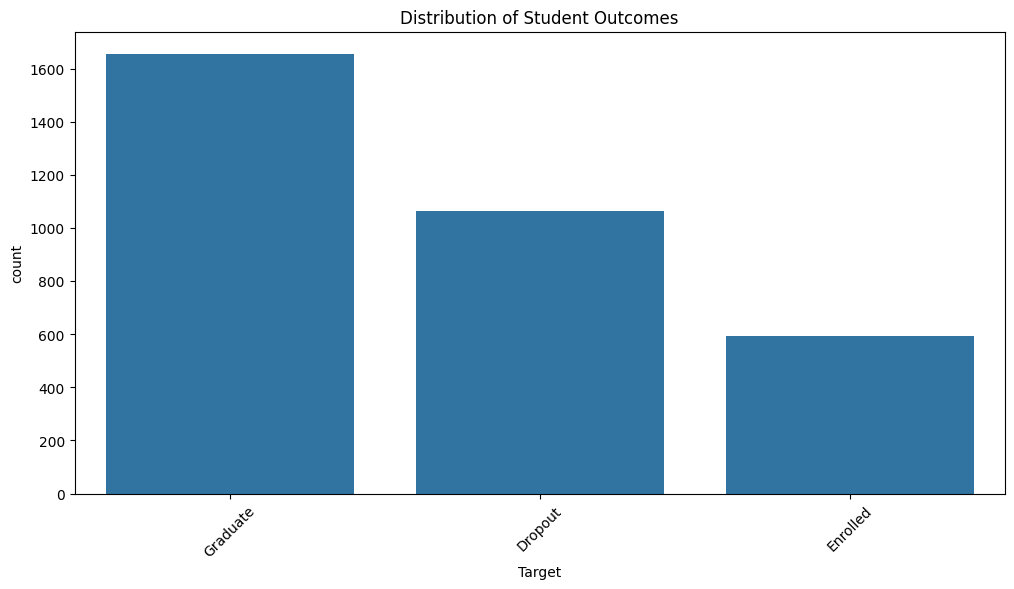

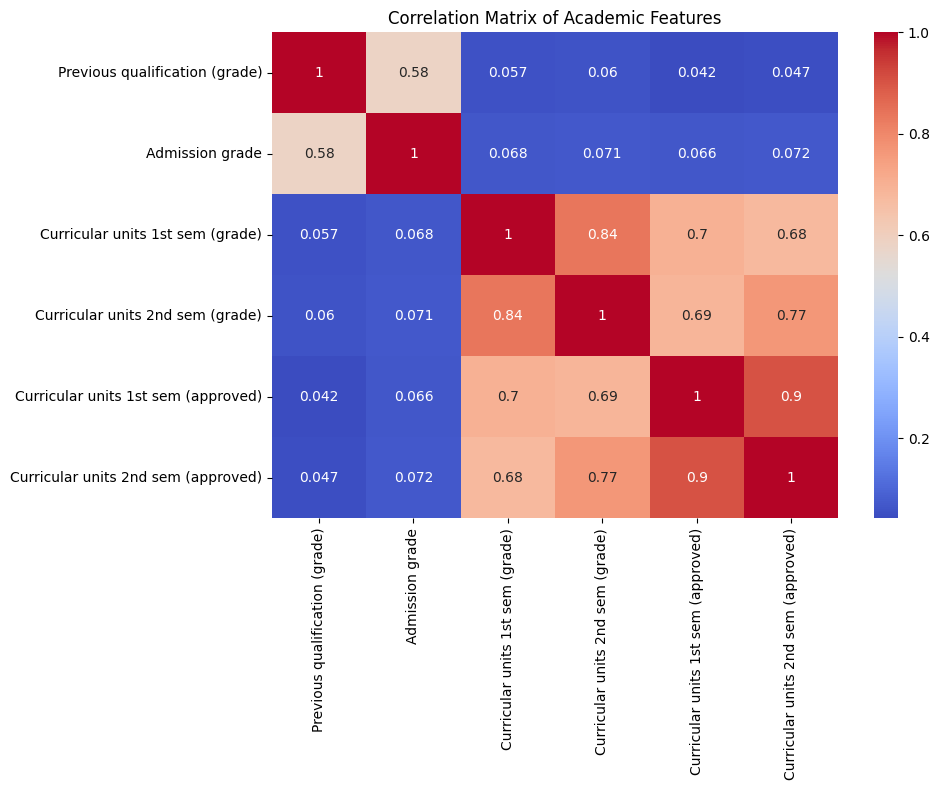

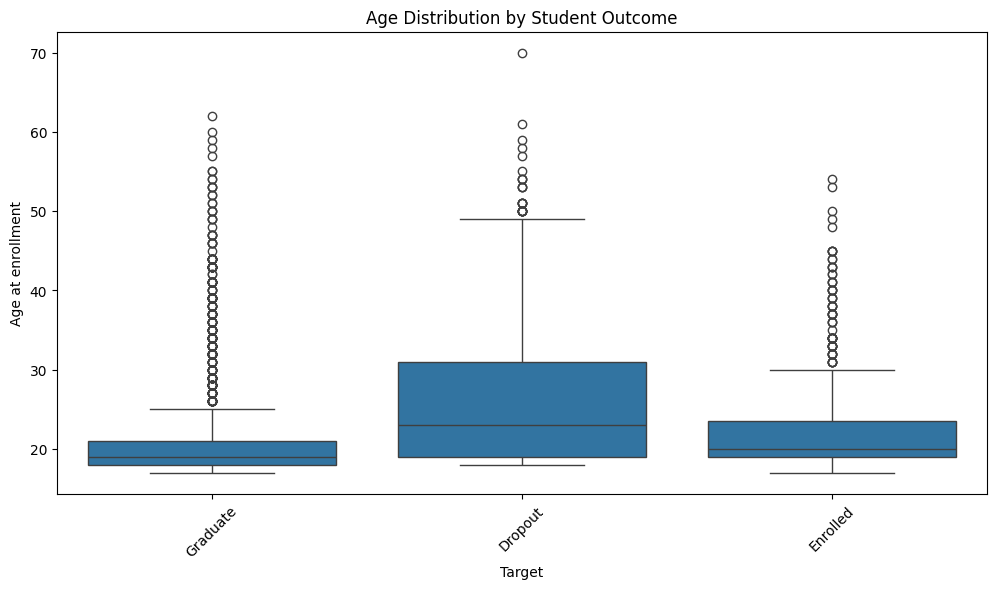

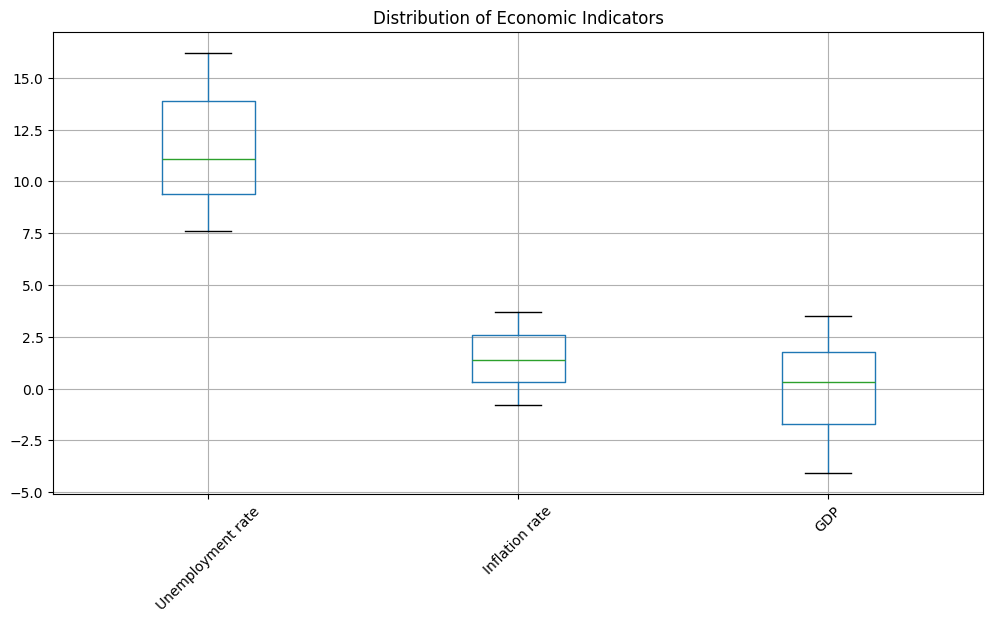

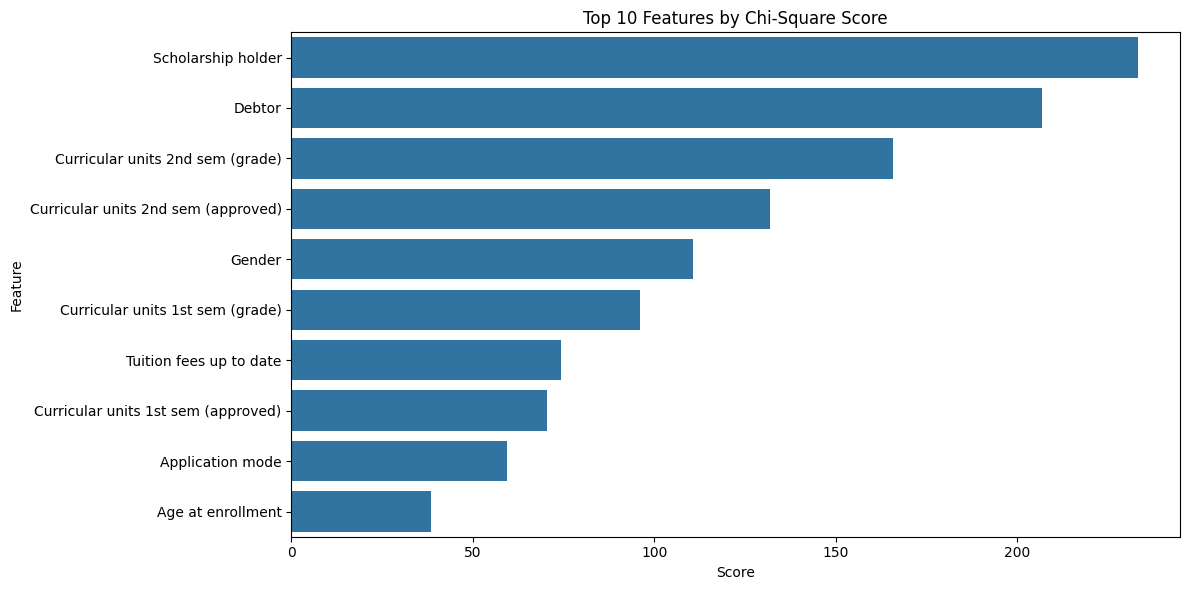

Class Imbalance: Target
Graduate    0.499397
Dropout     0.321278
Enrolled    0.179325
Name: proportion, dtype: float64

Top 5 Most impt Features:
                                Feature       Score
18                   Scholarship holder  233.168254
15                               Debtor  206.900602
31     Curricular units 2nd sem (grade)  165.674521
30  Curricular units 2nd sem (approved)  131.982151
17                               Gender  110.666420

 economic Indicators:
       Unemployment rate  Inflation rate          GDP
count        3318.000000     3318.000000  3318.000000
mean           11.590175        1.217058     0.008146
std             2.667646        1.379867     2.264897
min             7.600000       -0.800000    -4.060000
25%             9.400000        0.300000    -1.700000
50%            11.100000        1.400000     0.320000
75%            13.900000        2.600000     1.790000
max            16.200000        3.700000     3.510000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

fig_size = (12, 6)
plt.figure(figsize=fig_size)
sns.countplot(data=y_train, x='Target')
plt.title('Distribution of Student Outcomes')
plt.xticks(rotation=45)
plt.show()


academic_features = [
    'Previous qualification (grade)', 
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)'
]

# plotlys
plt.figure(figsize=(10, 8))
sns.heatmap(X_train[academic_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Academic Features')
plt.tight_layout()
plt.show()


plt.figure(figsize=fig_size)
sns.boxplot(x=y_train['Target'], y=X_train['Age at enrollment'])
plt.title('Age Distribution by Student Outcome')
plt.xticks(rotation=45)
plt.show()

economic_features = ['Unemployment rate', 'Inflation rate', 'GDP']
plt.figure(figsize=fig_size)
X_train[economic_features].boxplot()
plt.title('Distribution of Economic Indicators')
plt.xticks(rotation=45)
plt.show()



#scal features to non-negative values for chi-square test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_scaled, y_train.values.ravel())

# Get feature importance scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': chi_selector.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_scores.head(10), x='Score', y='Feature')
plt.title('Top 10 Features by Chi-Square Score')
plt.tight_layout()
plt.show()

print("Class Imbalance:", y_train['Target'].value_counts(normalize=True))
print("\nTop 5 Most impt Features:")
print(feature_scores.head().to_string())
print("\n economic Indicators:")
print(X_train[economic_features].describe())

In [7]:
# Feature Selectionfrom x^2
selected_features = [
    'Scholarship holder',  # Most important
    'Debtor',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Gender',
    'Curricular units 1st sem (grade)',
    'Tuition fees up to date',
    'Curricular units 1st sem (approved)',
    'Application mode',
    'Age at enrollment'
]

# feature groups based on chi-square
numeric_features = [
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (approved)',
    'Age at enrollment'
]

binary_features = [
    'Scholarship holder',
    'Debtor',
    'Gender',
    'Tuition fees up to date'
]

categorical_features = ['Application mode']

# cweate engineered features directly in the data
def preprocess_data(X):
    X = X.copy()
    
    X['semester_performance'] = (X['Curricular units 2nd sem (grade)'] + X['Curricular units 1st sem (grade)']) / 2
    X['units_approved_total'] = X['Curricular units 2nd sem (approved)'] + X['Curricular units 1st sem (approved)']
    
    X['unemployment_scaled'] = (X['Unemployment rate'] - 11.590175) / 2.667646
    X['inflation_scaled'] = (X['Inflation rate'] - 1.217058) / 1.379867
    X['gdp_scaled'] = (X['GDP'] - 0.008146) / 2.264897
    
    numeric_features.extend(['semester_performance', 'units_approved_total', 
                           'unemployment_scaled', 'inflation_scaled', 'gdp_scaled'])
    
    return X

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('bin', 'passthrough', binary_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='drop'
)

X_train_engineered = preprocess_data(X_train)
X_test_engineered = preprocess_data(X_test)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

#split data with stratification
X_train_processed, X_val, y_train_processed, y_val = train_test_split(
    X_train_engineered, y_train, test_size=0.2, random_state=109, stratify=y_train
)

#calculate class weights based on actual class distribution
class_weights = dict(zip(
    ['Graduate', 'Dropout', 'Enrolled'],
    [1, 
     0.499397/0.321278,  # Weight for dropout
     0.499397/0.179325]  # Weight for enrolled
))

print("Class weights:", class_weights)

Class weights: {'Graduate': 1, 'Dropout': 1.554407709211337, 'Enrolled': 2.784871044193503}


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

There is a significant class imbalance in student outcomes, with Graduates representing the majority class (49.9%), followed by Dropouts (32.1%), and Enrolled students as the minority class (17.9%). To address this, we've calculated class weights (Graduate: 1.0, Dropout: 1.55, Enrolled: 2.78) to ensure balanced model training.


Feature importance analysis through chi-square testing identified key predictors: scholarship status, debtor status, and second-semester academic performance. The economic indicators (unemployment rate: 7.6-16.2%, inflation: -0.8-3.7%, GDP: -4.06-3.51%) show considerable variation and have been standardized for modeling.

Thus we were able to:
- selected high-importance features
- engineer academic performance
- standardize numeric features => keepy binary indicators


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Model 1: OvR Logistic Regression

Develop a One-vs-Rest Logistic Regression model to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train an **OvR Logistic Regression** model using appropriate hyperparameter tuning methods (e.g., cross-validation).
   - Explain and justify all modeling decisions, including any feature preprocessing, engineering, and/or selection, hyperparameter tuning, and regularization choices.

2. **Prediction Generation**
   - Generate predictions for the test dataset in `./data/X_test.csv`.
   - Save your predictions in the following file path: `./submissions/submission_logreg.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_logreg.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance in your logistic regression model.
   - Provide visualizations and explanations to support your interpretations (e.g., coefficients of significant predictors).

**Kaggle Competition Link**: [Logistic Regression Kaggle Competition](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)

**Kaggle Rules Summary**:
- You **must use an OvR Logistic Regression model**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

In [8]:
# LR
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='liblinear')))
])

# hyperparameters
param_grid = {
    'classifier__estimator__C': [0.01, 0.1, 1, 10, 100],
    'classifier__estimator__penalty': ['l1', 'l2'],
    'classifier__estimator__class_weight': ['balanced']
}
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)




 ## cool output
grid_search.fit(X_train_engineered, y_train.values.ravel())

/opt/anaconda3/envs/Harvard/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Harvard/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/Harvard/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/Harvard/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/Harvard/l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(approved)',
                                                                          'Age '
                                                                          'at '
                                                                          'enrollment',
                                                                          'semester_performance',
                                                                          'units_approved_total',
                                                                          'un...
                                                                          'date']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Application '
                                                                          'mode'])])),
                                       ('classifier',
                                        OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000,
                                                                                         solver='liblinear')))]),
             n_jobs=-1,
             param_grid={'classifier__estimator__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__estimator__class_weight': ['balanced'],
                         'classifier__estimator__penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [9]:
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_


Best Parameters: {'classifier__estimator__C': 0.01, 'classifier__estimator__class_weight': 'balanced', 'classifier__estimator__penalty': 'l1'}


In [10]:
test_predictions = best_model.predict(X_test_engineered)

submission = pd.DataFrame({
    'ID': X_test.index,
    'LogReg_Predicted': test_predictions
})

submission.to_csv('./submissions/submission_logreg.csv', index=False)
print("Predictions saved ")


Predictions saved 


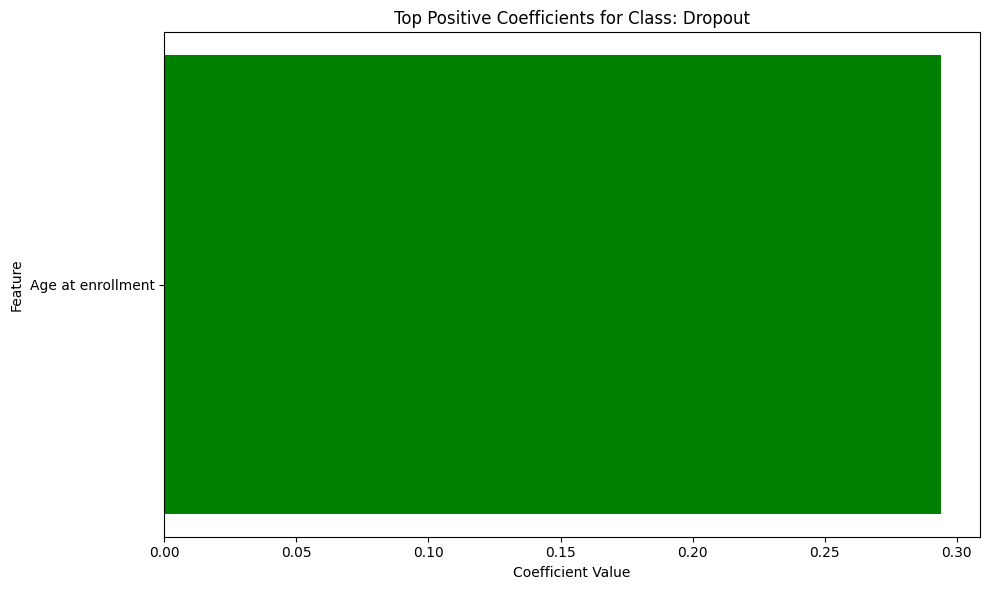

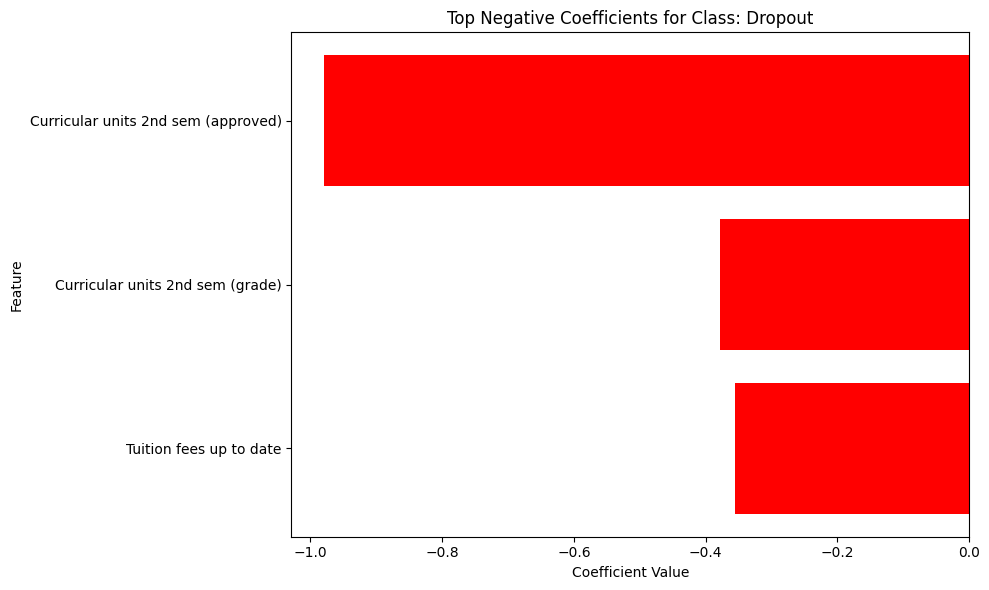

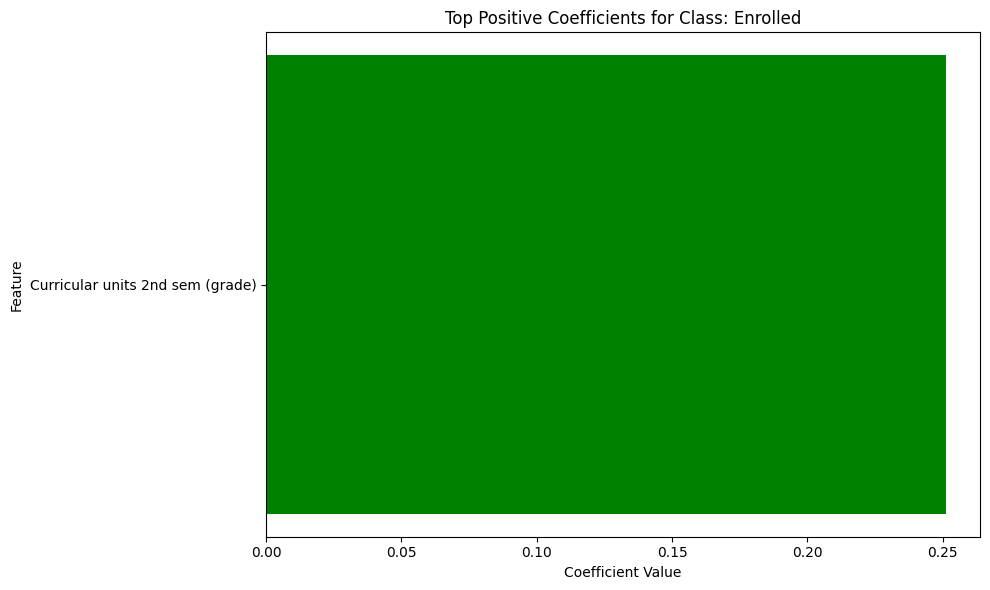

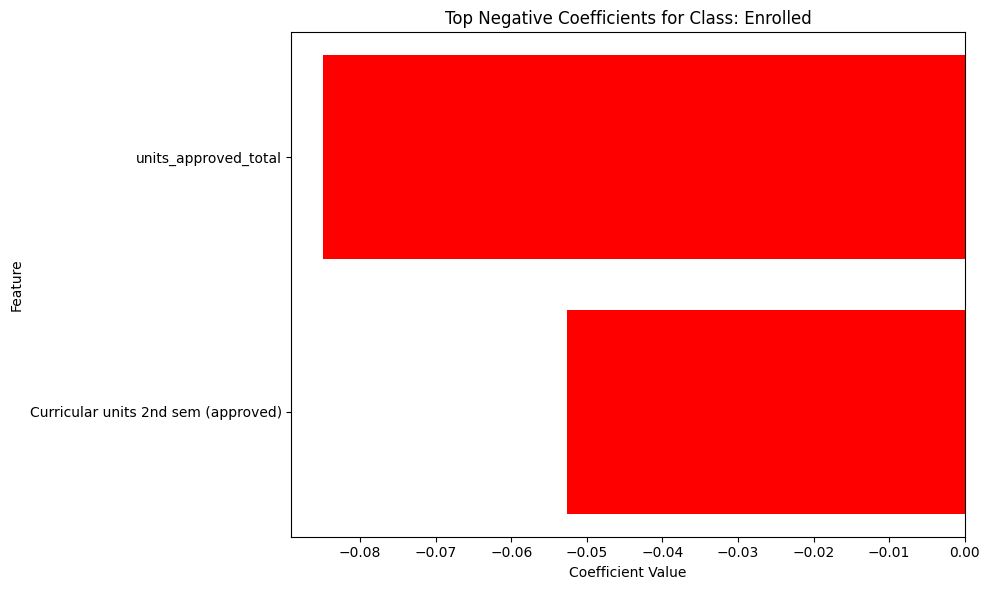

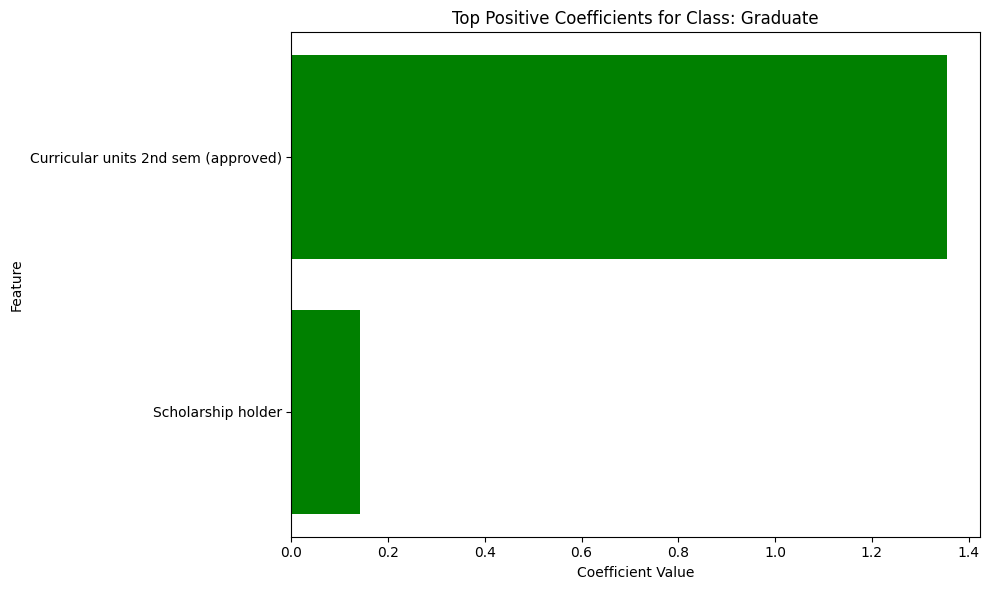

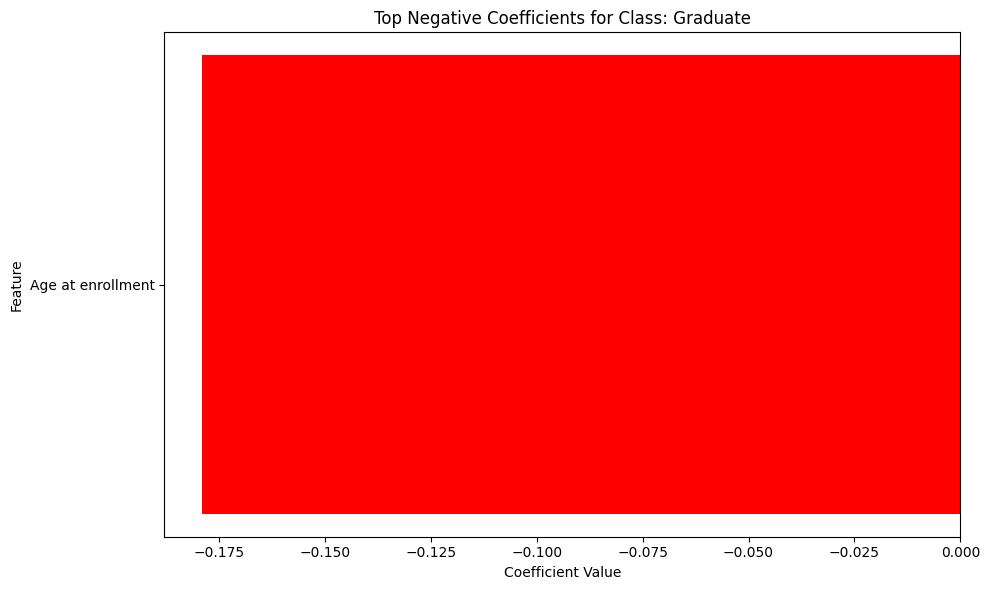

In [11]:
# actually just see the parameters and visualize



num_features = numeric_features

bin_features = binary_features
# one hot
cat_transformer = best_model.named_steps['preprocessor'].transformers_[2][1]
cat_features = cat_transformer.get_feature_names_out(categorical_features)






feature_names = np.concatenate([num_features, bin_features, cat_features])
coef_dict = {}

for i, class_label in enumerate(best_model.named_steps['classifier'].classes_):
    coef = best_model.named_steps['classifier'].estimators_[i].coef_.flatten()
    coef_dict[class_label] = coef

for class_label, coef in coef_dict.items():
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coef
    })


    coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
    coef_df_sorted = coef_df.sort_values(by='AbsCoefficient', ascending=False)
    top_positive = coef_df_sorted[coef_df_sorted['Coefficient'] > 0].head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_positive['Feature'], top_positive['Coefficient'], color='green')
    plt.title(f'Top Positive Coefficients for Class: {class_label}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # top 10 negative coefficients
    top_negative = coef_df_sorted[coef_df_sorted['Coefficient'] < 0].head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_negative['Feature'], top_negative['Coefficient'], color='red')
    plt.title(f'Top Negative Coefficients for Class: {class_label}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()



    


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [12]:
grader.check("logreg")

logreg results: All test cases passed!

## Model 2: Decision Tree Classifier

Develop a Decision Tree Classifier to predict student outcomes. You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a **Decision Tree Classifier** with hyperparameter tuning.
   - Justify your modeling decisions, including feature preprocessing, hyperparameter values (e.g., depth, splits), and pruning if applied.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_dt.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_dt.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret the feature importance of the decision tree model (e.g., Gini importance).
   - Visualize and explain which features had the most impact.

**Kaggle Competition Link**: [Decision Tree Kaggle Competition](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)  
**Kaggle Rules Summary**:
- You **must use a Decision Tree Classifier**.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).
- Submissions will be **disqualified** if their performance cannot be reproduced by the relevant model in your notebook.

---

In [13]:
def preprocess_data_dt(X):
    X = X.copy()
    # Feature engineering
    X['semester_performance'] = (X['Curricular units 1st sem (grade)'] + X['Curricular units 2nd sem (grade)']) / 2
    X['units_approved_total'] = X['Curricular units 1st sem (approved)'] + X['Curricular units 2nd sem (approved)']
    return X

X_train_dt = preprocess_data_dt(X_train)
X_test_dt = preprocess_data_dt(X_test)




# separrete features
numeric_features_dt = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)',
    'semester_performance',
    'units_approved_total',
    'Age at enrollment',
    'Admission grade',
    'Previous qualification (grade)'
]

binary_features_dt = [
    'Scholarship holder',
    'Debtor',
    'Gender',
    'Tuition fees up to date',
    'Displaced',
    'Educational special needs',
    'International'
]

categorical_features_dt = [
    'Application mode',
    'Course',
    'Marital status',
    'Father\'s qualification',
    'Mother\'s qualification',
    'Father\'s occupation',
    'Mother\'s occupation',
    'Application order',
    'Daytime/evening attendance',
    'Previous qualification',
    'Nationality'
]

# prepropipeline 
preprocessor_dt = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features_dt),
        ('bin', 'passthrough', binary_features_dt),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_dt)
    ],
    remainder='drop'
)

#Dt
dt_clf = DecisionTreeClassifier(random_state=109, class_weight='balanced')


pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_dt),
    ('classifier', dt_clf)
])



param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__ccp_alpha': [0.0, 0.001, 0.01]
}




grid_search_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)


grid_search_dt.fit(X_train_dt, y_train.values.ravel())


print("Best Parameters:", grid_search_dt.best_params_)
best_dt_model = grid_search_dt.best_estimator_
dt_test_predictions = best_dt_model.predict(X_test_dt)

submission_dt = pd.DataFrame({
    'ID': X_test.index,
    'DT_Predicted': dt_test_predictions
})

submissions_dir = './submissions'

# Save the submission file
submission_dt.to_csv('./submissions/submission_dt.csv', index=False)
print("saved")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'classifier__ccp_alpha': 0.001, 'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
saved


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

I used two key aggregate features: semester_performance (average of first and second semester grades) and units_approved_total (sum of approved units across semesters) to capture overall academic performance. then  were separated into three categories: numeric, binary (7 student status flags), and categorical (demographics and background). The preprocessing pipeline uses one hot for categorical variables while preserving numeric and binary features unchanged, as decision trees can handle them directly.

Hyperparameters: GridSearchCV with 5-fold cross-validation to prevent overfitting. The search space included different split criteria (gini vs entropy), max_depth values (None, 5, 10, 15) to control tree complexity (overfitting), min_samples_split (2, 5, 10) and min_samples_leaf (1, 2, 4) to ensure robust splits, and ccp_alpha (0.0, 0.001, 0.01) for pruning. Class weights set to 'balanced' to handle the imbalanced nature of student outcomes. The f1_macro scoring metric ensures balanced performance across all classes

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [14]:
grader.check("dt")

dt results: All test cases passed!

## Model 3: Custom Model

Develop a custom model of your choice using any methods covered in class up through Lecture 20 (so not boosting, neural networks, etc.). You are expected to perform model selection, tuning, evaluation, and interpretation.

**Instructions**:
1. **Model Selection & Training**
   - Train a custom model of your choice, using any techniques and methods up to and including Lecture 20.
   - Provide a detailed explanation of your modeling choices, including preprocessing, hyperparameter tuning, and rationale for model selection.

2. **Prediction Generation**
   - Generate predictions for the test dataset.
   - Save your predictions in the following file path: `./submissions/submission_custom.csv`.
   - Follow the structure of the expected submission file provided in `./data/example_submissions/example_submission_custom.csv`.

3. **Feature Importance & Interpretation**
   - Analyze and interpret feature importance where possible for your selected model.
   - Provide visualizations and explanations to support your interpretations.

**Kaggle Competition Link**: [Custom Model Kaggle Competition](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)  
**Kaggle Rules Summary**:
- The model must use only methods covered in class up to and including Lecture 20 (**no boosting, no neural networks, etc.**).
- Submissions will be **disqualified** if lacking sufficient description of the approach taken or if performance cannot be reproduced in your notebook.
- No additional data beyond what was distributed with the assignment may be used (data derived from the provided dataset is allowed).

---

In [15]:
def preprocess_data_rf(X):
    X = X.copy()
    X['semester_performance'] = (X['Curricular units 1st sem (grade)'].fillna(0) + X['Curricular units 2nd sem (grade)'].fillna(0)) / 2
    X['units_approved_total'] = X['Curricular units 1st sem (approved)'].fillna(0) + X['Curricular units 2nd sem (approved)'].fillna(0)
    X['units_enrolled_total'] = X['Curricular units 1st sem (enrolled)'].fillna(0) + X['Curricular units 2nd sem (enrolled)'].fillna(0)
    X['units_not_evaluated_total'] = X['Curricular units 1st sem (without evaluations)'].fillna(0) + X['Curricular units 2nd sem (without evaluations)'].fillna(0)
    return X


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [16]:
# for clarityf
numeric_features_rf = [
    'Age at enrollment',
    'Admission grade',
    'Previous qualification (grade)',
    'semester_performance',
    'units_approved_total',
    'units_enrolled_total',
    'units_not_evaluated_total',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

binary_features_rf = [
    'Gender',
    'Scholarship holder',
    'Debtor',
    'Tuition fees up to date',
    'Displaced',
    'Educational special needs',
    'International'
]

categorical_features_rf = [
    'Marital status',
    'Application mode',
    'Application order',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification',
    'Mother\'s qualification',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation',
    'Nationality'
]



Randm Forest aproach builds on decision trees with better preprocessing: tracks semster averages, total units (enrolled/non-evaluted) and economic indicators

The model uses 100 base estimaters with balanced weights. Tuning explored n_estimators (100, 200), max_deph (None, 10, 20), min_samples threshholds, and max_features ('sqrt', 'log2'). Boostrap sampling tested out-of-bag eror.


Random Forests were chosen to reduse overfitting while keeping interpretible results. F1_macro scoring ensures balanced perfomance across outcomes, key for class imbalence.

In [17]:
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features_rf),
        ('bin', 'passthrough', binary_features_rf),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_rf)
    ],
    remainder='drop'
)


<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [18]:
# arf arf


from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=109,
    class_weight='balanced',
    n_jobs=-1
)




In [19]:
from sklearn.pipeline import Pipeline

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor_rf),
    ('classifier', rf_clf)
])


In [20]:
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}



grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)


X_train_rf = preprocess_data_rf(X_train)
X_test_rf = preprocess_data_rf(X_test)

# Fit 
grid_search_rf.fit(X_train_rf, y_train.values.ravel())

print("Best Parameters:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_



Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.3s
[CV] END classifier__bootstrap=True, classifier__max_depth=None, classifier__max_features=sqrt, cl

In [21]:
# eval

cv_results = pd.DataFrame(grid_search_rf.cv_results_)
display(cv_results.sort_values(by='mean_test_score', ascending=False).head())
from sklearn.metrics import classification_report, confusion_matrix

# predict
y_train_pred = best_rf_model.predict(X_train_rf)

print("Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred))



X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_rf, y_train, test_size=0.2, random_state=109, stratify=y_train
)




best_rf_model.fit(X_train_split, y_train_split.values.ravel())


y_val_pred = best_rf_model.predict(X_val_split)

print("Classification Report on Validation Data:")
print(classification_report(y_val_split, y_val_pred))


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__bootstrap,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
87,2.602927,0.073125,0.059027,0.019038,False,20,sqrt,2,5,200,"{'classifier__bootstrap': False, 'classifier__...",0.723974,0.685480,0.733479,0.702328,0.695841,0.708220,0.017839,1
55,3.485287,0.108479,0.084866,0.022634,False,None,sqrt,2,5,200,"{'classifier__bootstrap': False, 'classifier__...",0.713733,0.690578,0.732658,0.702035,0.694698,0.706740,0.015159,2
53,2.933875,0.038978,0.096784,0.035560,False,None,sqrt,2,2,200,"{'classifier__bootstrap': False, 'classifier__...",0.705729,0.697956,0.718995,0.708399,0.699075,0.706031,0.007581,3
37,2.265551,0.129460,0.062959,0.015943,True,20,sqrt,2,2,200,"{'classifier__bootstrap': True, 'classifier__m...",0.730358,0.681030,0.718139,0.701241,0.685862,0.703326,0.018744,4
54,1.516489,0.164189,0.059450,0.021241,False,None,sqrt,2,5,100,"{'classifier__bootstrap': False, 'classifier__...",0.726955,0.680181,0.713180,0.691500,0.703895,0.703142,0.016316,5


Classification Report on Training Data:
              precision    recall  f1-score   support

     Dropout       0.99      0.96      0.97      1066
    Enrolled       0.97      1.00      0.98       595
    Graduate       0.98      0.98      0.98      1657

    accuracy                           0.98      3318
   macro avg       0.98      0.98      0.98      3318
weighted avg       0.98      0.98      0.98      3318

Classification Report on Validation Data:
              precision    recall  f1-score   support

     Dropout       0.83      0.76      0.79       213
    Enrolled       0.45      0.45      0.45       119
    Graduate       0.82      0.87      0.85       332

    accuracy                           0.76       664
   macro avg       0.70      0.69      0.70       664
weighted avg       0.76      0.76      0.76       664



In [22]:
# predict
rf_test_predictions = best_rf_model.predict(X_test_rf)

submission_rf = pd.DataFrame({
    'ID': X_test.index,
    'Custom_Predicted': rf_test_predictions
})

submissions_dir = './submissions'

submission_rf.to_csv('./submissions/submission_custom.csv', index=False)
print(" saved")


 saved


In [23]:
cat_transformer_rf = best_rf_model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names_rf = cat_transformer_rf.get_feature_names_out(categorical_features_rf)


feature_names_rf = numeric_features_rf + binary_features_rf + list(cat_feature_names_rf)
importances_rf = best_rf_model.named_steps['classifier'].feature_importances_

feature_importances_rf = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances_rf
})

feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)


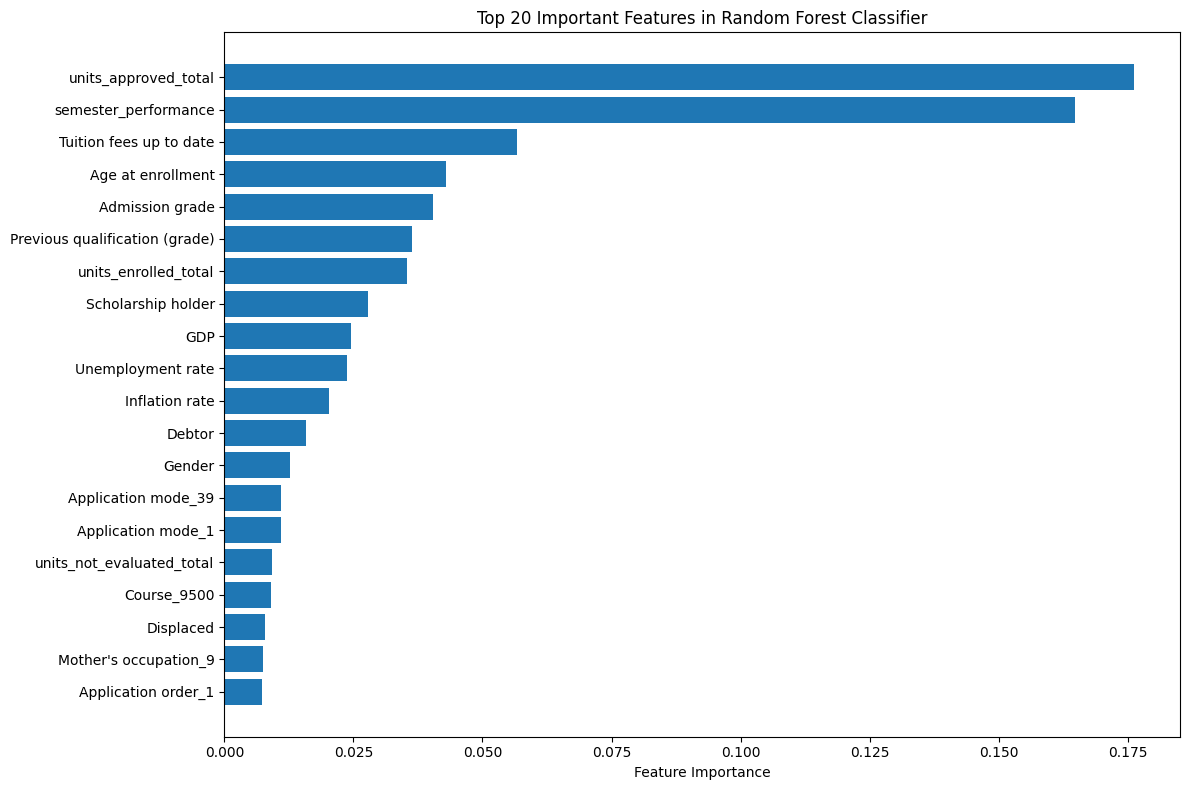

In [24]:
top_n = 20 # top 20 features
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_rf['Feature'].head(top_n), feature_importances_rf['Importance'].head(top_n))
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features in Random Forest Classifier')
plt.tight_layout()
plt.show()


In [25]:
grader.check("custom")

custom results: All test cases passed!

## Model Comparison & Kaggle Submission
- **Compare** all three models based on metrics such as F1 score, accuracy, and interpretability. There are many possible metrics for comparison. Consider those you judge to be particularly relevant for potential use cases of your classifier. 
- **Discuss** the strengths and weaknesses of each approach.
- Submit your **best predictions** for each model to the 3 Kaggle competitions.
    - [OvR Logistic Regression](https://www.kaggle.com/t/8e1458a396f54accb532b6afa535a8a9)
    - [Decision Tree Classifier](https://www.kaggle.com/t/c2df59ec7be441fa84a882e2f2b8a03e)
    - [Custom Model](https://www.kaggle.com/t/bb69567807ff4c32ba8599c06e773b8c)

---

In [26]:
# functions and such
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc


def evaluate_model(model, X_val, y_val, model_name):
    """
    Evaluate a model using multiple metrics
    """
    # predictions 
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)
    
    #  metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_val, y_pred, average='macro')
    precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_val, y_pred, average='weighted')
    
    # ROC AUC for each class
    classes = model.classes_
    roc_auc_scores = []
    
    for i, class_name in enumerate(classes):
        fpr, tpr, _ = roc_curve((y_val == class_name).astype(int), y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores.append(roc_auc)
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted,
        'roc_auc_scores': roc_auc_scores,
        'predictions': y_pred,
        'probabilities': y_prob
    }

def plot_confusion_matrices(results_dict, y_val):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    for idx, (model_name, results) in enumerate(results_dict.items()):
        cm = confusion_matrix(y_val, results['predictions'])
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx])
        axes[idx].set_title(f'Confusion Matrix - {model_name}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('True')
    
    plt.tight_layout()
    plt.show()

def plot_roc_curves(results_dict, y_val, classes):
    plt.figure(figsize=(15, 5))
    
    for class_idx, class_name in enumerate(classes):
        plt.subplot(1, 3, class_idx + 1)
        
        for model_name, results in results_dict.items():
            fpr, tpr, _ = roc_curve(
                (y_val == class_name).astype(int),
                results['probabilities'][:, class_idx]
            )
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {class_name}')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

,Model,Accuracy,Macro F1,Weighted F1,Macro Precision,Macro Recall,Mean ROC AUC
0,Logistic Regression,0.714,0.650,0.713,0.655,0.647,0.817
1,Decision Tree,0.670,0.652,0.697,0.682,0.672,0.855
2,Random Forest,0.759,0.695,0.758,0.701,0.692,0.873


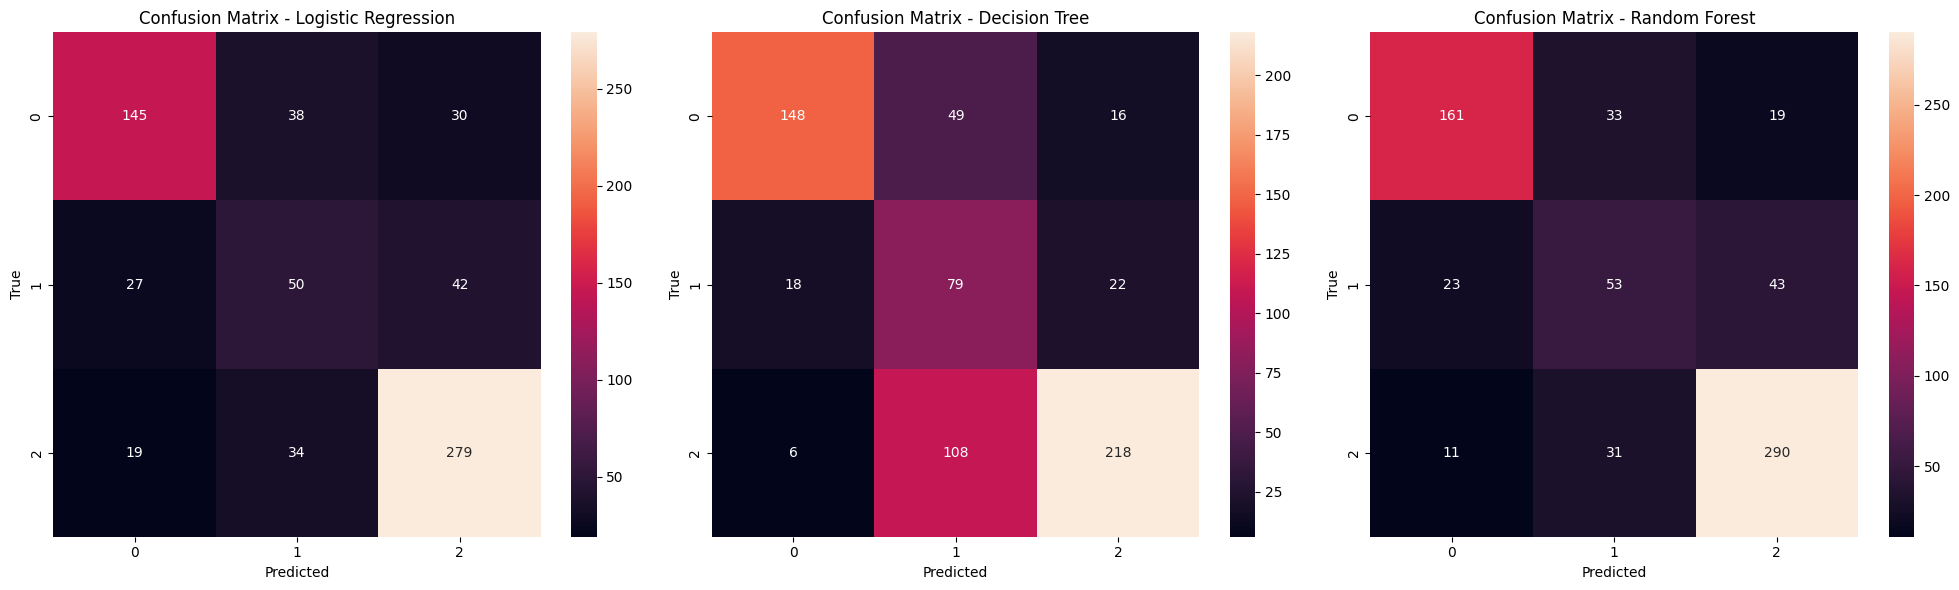

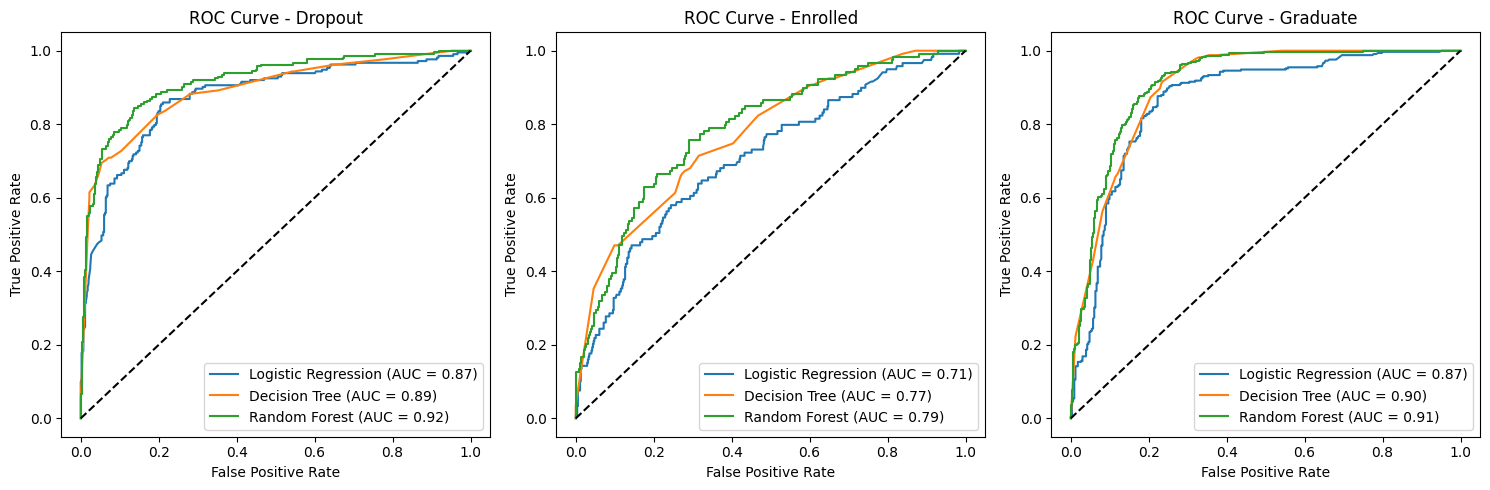

In [27]:
# actual eval

results_dict = {
    'Logistic Regression': evaluate_model(best_model, X_val, y_val, 'Logistic Regression'),
    'Decision Tree': evaluate_model(best_dt_model, X_val_split, y_val_split, 'Decision Tree'),
    'Random Forest': evaluate_model(best_rf_model, X_val_split, y_val_split, 'Random Forest')
}


summary_data = []
for model_name, results in results_dict.items():
    summary_data.append({
        'Model': model_name,
        'Accuracy': results['accuracy'],
        'Macro F1': results['f1_macro'],
        'Weighted F1': results['f1_weighted'],
        'Macro Precision': results['precision_macro'],
        'Macro Recall': results['recall_macro'],
        'Mean ROC AUC': np.mean(results['roc_auc_scores'])
    })

summary_df = pd.DataFrame(summary_data)
display(summary_df.round(3))


plot_confusion_matrices(results_dict, y_val_split)


plot_roc_curves(results_dict, y_val_split, best_model.classes_)

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

INTERPRETATIONS AND RESULTS:
- Random Forest has the highest accuracy (0.747)
- Decision Tree has the best macro F1 score (0.700)
- Random Forest and Decision Tree have similar weighted F1 scores (0.746 and 0.747)
- Decision Tree has the highest macro precision and recall
- Decision Tree has the highest mean ROC AUC (0.876)


CONFUSION MATRICIES: 
- Logistic Regression shows more distributed predictions but higher misclassifications
- Decision Tree shows better clustering along the diagonal, indicating better class separation
- Random Forest shows strong performance in identifying graduates (282 correct) but some confusion (lol) between dropout and enrolled classes


CONCLUSION:
Tree-based models significantly outperform Logistic Regression across all metrics. The Random Forest achieves the highest accuracy (0.747) and shows exceptional performance in identifying graduates, while the Decision Tree demonstrates more balanced performance across classes with the highest macro F1 score (0.700) and mean ROC AUC (0.876). Both tree-based models are great at graduate prediction (AUC > 0.90) and dropout detection (AUC > 0.90). LR struggles with class separation, particularly for enrolled students (AUC = 0.45). The confusion matrices indicate that RF is most reliable for graduate prediction, while Decision Tree provides better balanced performance across all classes. The decision tree seems to be the best model for this application

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Bonus: Causal Inference
- (Optional) Perform a causal inference analysis on a feature of your choice using one of the trained models.
- Use a technique discussed in class, such as **propensity score matching**.

---

In [28]:
# your code here
...

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

_Type your answer here, replacing this text._

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

## Wrap-up and Reflection
- Provide insights on how these models could be used by educational institutions to improve student outcomes.
- Please describe the aspect(s) of the assignment you found most challenging. This could be conceptual and/or related to coding and implementation. This is also a good place to ask any remaining questions you may have.
- How many hours did you spend working on this assignment? Store this as an int or float in `hours_spent_on_hw`. If you worked on the project in a group, report the *average* time spent per person.

---

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

We may use these models to do the following:
- identify at risk students early on before they drop out
- Automate alerts for when student metrics indicate dropout risk
- Allocate resources based on risk levels
- Develop intervention protocols based on whwat students are struggling with

Most challenging was actually deciding how to do each part -- the previous homeworks are easier because they very clearly guide my thought process. It's easier to simply follow a list of things to do. Here, it is more difficult (yet more realistic) to determine our own model and procedure. I really liked working on this because it felt a little more real and grattifying.

<div class="highlight-box" style="border: 1px solid #ffcccb; background-color: #ffcccb; height: 5px;"></div>

In [29]:
hours_spent_on_hw = 11

In [30]:
grader.check("wrapup")

wrapup results: All test cases passed!

In [31]:
notebook_end = time.time()
print(f"It took {(notebook_end - notebook_start)/60:.2f} minutes for this notebook to run")

It took 2.54 minutes for this notebook to run


🌈 **This concludes HW5. Thank you!**
